In [2]:
# import libraries and packages 

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns

# 1. Data Gathering

### a) Load Twitter Archive

In [3]:
# load / read twitter archive from given csv file
df_twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# display twitter archive data to see especially which different columns are included
df_twitter_arc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### b) Load Tweet Image Predictions

In [5]:
# given url: 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# using requests library 
r = requests.get(url, allow_redirects=True)

# open it
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [6]:
# load / read image predictions data 
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# display image predictions data
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### c) Load Retweets and Favorites

In [11]:
# by now, I haven´t had a twitter account, so I created one and got my API keys as well: 

consumer_key = 'XXX'
consumer_secret = 'XXX'

# I also received a bearer token, but could handle it without it and with the help of 
# http://docs.tweepy.org/en/latest/auth_tutorial.html 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [12]:
# tweet ids analogous to twitter archive tweet ids 
tweet_ids = list(df_twitter_arc.tweet_id)

# empty sets for tweet data 
tweet_data = {}
fails_dict = {}

# loop 
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

print(fails_dict)

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Rate limit reached. Sleeping for: 751
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 749
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found w

In [13]:
# writing the data into text file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [14]:
# reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    
# loop to store each tweets set (id, retweet and favorite)
tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets, 'favorites': favorites})

In [18]:
# create new data frame 
df_tweets_info = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites'])

In [19]:
# save new data frame
df_tweets_info.to_csv('df_tweets_info.csv')

In [7]:
# open / load new data frame
df_tweets_info = pd.read_csv('df_tweets_info.csv')
df_tweets_info.head()

,Unnamed: 0,tweet_id,retweets,favorites
0,0,892420643555336193,7444,35285
1,1,892177421306343426,5531,30529
2,2,891815181378084864,3659,22972
3,3,891689557279858688,7619,38569
4,4,891327558926688256,8211,36858


Thus a total of three datasets were created which are analyzed in more detail below. 

- df_twitter_arc: dataset with information on basic tweet data. 
- df_image: dataset with information on predictions about the image. 
- df_tweets_info: dataset with information of retweets and favorites. 

# 2. Data Assessing

After gathering, the datasets now should be investigated visually and programmatically for quality and tidiness issues.
At least eight quality issues and two tidiness issues should be addressed. 

a) Assessing the df_twitter_arc dataset

In [13]:
# check the column names and get a first glimpse 
df_twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# check the data types and amount of entries 
df_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [39]:
# check and scroll through the entire data set 
df_twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [40]:
# check for null values
df_twitter_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [41]:
# check for duplicates
df_twitter_arc.duplicated().sum()

0

In [47]:
# check if a tweet id is duplicated or comes up twice
df_twitter_arc.tweet_id.duplicated().sum(), df_twitter_arc.tweet_id.nunique()

(0, 2356)

In [35]:
# check the denominator values
df_twitter_arc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [36]:
# display the tweet with denominator equals 0. 
df_twitter_arc.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [37]:
# check the denominator values not equal to 10 
df_twitter_arc.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
# check the dog names
dog_names = []
dog_names = df_twitter_arc['name'].unique()
dog_names.sort()
dog_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

### Observations and key findings of the twitter archive dataset: 

#### Quality

- Missing values in the following columns: 

    in_reply_to_status_id         
    in_reply_to_user_id           
    retweeted_status_id           
    retweeted_status_user_id      
    retweeted_status_timestamp   
    expanded_urls                  
    
    -> Especially the retweet columns provide no additional / useful information in this dataset 
    
    Tweets without expanded_urls should also be dropped, keep only orginial tweets with images. 
    

- last four columns doggo, floofer, pupper, puppo which have missing values as well, have "None" instead of "NaN"

- "tweet_id" has data type int, should be string 

- all timestamp entries end with "+0000" 

- incorrect denominator values. One is even zero(!) 

- at the end of the dog names list there are some words beginning with lowercases and which are definitely no dog names: 
        'a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very'
  (btw, in my eyes the name "Schnitzel" for a dog is a bit bizarre, but just my opinion and nothing which has to be cleared :)) 




#### Tidiness 

- last four columns doggo, floofer, pupper, puppo should be grouped in one column, since only one of these can occur. 



b) Assessing the df_image dataset

In [97]:
# check the data types and amount of entries 
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
# check the column names and get a first glimpse 
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [99]:
# check and scroll through the entire data set 
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [100]:
# check if a tweet id is duplicated or comes up twice
df_image.tweet_id.duplicated().sum(), df_image.tweet_id.nunique()

(0, 2075)

In [101]:
# check non unique 
df_image.img_num.nunique()

4

In [103]:
# check value counts
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
# check the column names
df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
# check for null values
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Observations and key findings of the image dataset: 

#### Quality

- No missing values, but only 2075 entries
- image number is mostly 1, only a few cases with more than 1 image
- tweet_id should be string instead of int
- Apart from that, from a quality point of view, it looks quite neat



#### Tidiness 

- Should be joined with the df_twitter_arc dataset by reference to the tweet id. 


c) Assessing the df_tweets_info dataset

In [27]:
# check the data types and amount of entries 
df_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
Unnamed: 0    2331 non-null int64
tweet_id      2331 non-null int64
retweets      2331 non-null int64
favorites     2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [28]:
# check the column names and get a first glimpse 
df_tweets_info.head()

,Unnamed: 0,tweet_id,retweets,favorites
0,0,892420643555336193,7444,35285
1,1,892177421306343426,5531,30529
2,2,891815181378084864,3659,22972
3,3,891689557279858688,7619,38569
4,4,891327558926688256,8211,36858


In [29]:
# check and scroll through the entire data set 
df_tweets_info

,Unnamed: 0,tweet_id,retweets,favorites
0,0,892420643555336193,7444,35285
1,1,892177421306343426,5531,30529
2,2,891815181378084864,3659,22972
3,3,891689557279858688,7619,38569
4,4,891327558926688256,8211,36858
5,5,891087950875897856,2751,18588
6,6,890971913173991426,1779,10802
7,7,890729181411237888,16651,59451
8,8,890609185150312448,3803,25577
9,9,890240255349198849,6460,29184


In [30]:
# check if a tweet id is duplicated or comes up twice
df_tweets_info.tweet_id.duplicated().sum(), df_tweets_info.tweet_id.nunique()

(0, 2331)

In [31]:
# check for null values
df_tweets_info.isnull().sum()

Unnamed: 0    0
tweet_id      0
retweets      0
favorites     0
dtype: int64

### Observations and key findings of the tweets info dataset: 

#### Quality

- No missing values, but only 2331 entries
- tweet_id should be string instead of int
- Second column with indexes, named "Unnamed: 0" 
- Apart from that, from a quality point of view, it looks quite neat


#### Tidiness 

- Should be joined with the df_twitter_arc dataset by reference to the tweet id. 

## Conclusion of part assessing and deduction of to dos: 

#### Quality

- change tweet_id data type from int to string in all datasets

The following refer to the twitter arc dataset:

- drop the retweet columns, since they provide no useful information:

    in_reply_to_status_id,
    in_reply_to_user_id,
    retweeted_status_id,
    retweeted_status_user_id,
    retweeted_status_timestamp
    
    
- Also drop tweets without expanded_urls, keep only orginial tweets with images.    
- change "None" values to "NaN" for 'doggo', 'floofer', 'pupper', 'puppo'
- remove "+0000" from timestamp 
- remove the rows with incorrect dog names: 

     'a', 'actually', 'all', 'an', 'by', 'getting', 'his',
     'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
     'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
     'this', 'unacceptable', 'very'
     
     
- revise / remove incorrect denominator values 

- in tweets info dataset: remove second column with indexes, named "Unnamed: 0"
- create a rating column based on numerators and denominators

#### Tidiness

- doggo, floofer, pupper, puppo columns should be replaced with one new column and value via melt. 
- join the three datsets to one master dataset


# 3. Data Cleaning

In [187]:
# First of all, create copies of the datasets
archive_clean = df_twitter_arc.copy()
image_clean = df_image.copy()
tweets_clean = df_tweets_info.copy()

#### Define

change tweet_id data type from int to string in all datasets

#### Code

In [188]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

#### Test

In [189]:
archive_clean.info(), image_clean.info(), tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

(None, None, None)

#### Define

- drop the retweet columns, since they provide no useful information:

    in_reply_to_status_id,
    in_reply_to_user_id,
    retweeted_status_id,
    retweeted_status_user_id,
    retweeted_status_timestamp
    
#### Code

In [190]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [191]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                   'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [192]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

Also drop tweets without expanded_urls, keep only orginial tweets with images.
    
#### Code

In [193]:
archive_clean = archive_clean[~archive_clean['expanded_urls'].isnull()]

#### Test

In [194]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

change "None" values to "NaN" for 'doggo', 'floofer', 'pupper', 'puppo'
    
#### Code

In [195]:
replace_columns = ['doggo', 'floofer', 'pupper', 'puppo']

for rep in replace_columns: 
    archive_clean[rep].replace('None', value=np.nan, inplace=True)

#### Test

In [196]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### Define

remove "+0000" from timestamp
    
#### Code

In [197]:
archive_clean.timestamp = archive_clean.timestamp.str[:-5]

#### Test

In [198]:
archive_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
5       2017-07-29 00:08:17 
6       2017-07-28 16:27:12 
7       2017-07-28 00:22:40 
8       2017-07-27 16:25:51 
9       2017-07-26 15:59:51 
10      2017-07-26 00:31:25 
11      2017-07-25 16:11:53 
12      2017-07-25 01:55:32 
13      2017-07-25 00:10:02 
14      2017-07-24 17:02:04 
15      2017-07-24 00:19:32 
16      2017-07-23 00:22:39 
17      2017-07-22 16:56:37 
18      2017-07-22 00:23:06 
19      2017-07-21 01:02:36 
20      2017-07-20 16:49:33 
21      2017-07-19 16:06:48 
22      2017-07-19 03:39:09 
23      2017-07-19 00:47:34 
24      2017-07-18 16:08:03 
25      2017-07-18 00:07:08 
26      2017-07-17 16:17:36 
27      2017-07-16 23:58:41 
28      2017-07-16 20:14:00 
29      2017-07-15 23:25:31 
                ...         
2326    2015-11-17 00:24:19 
2327    2015-11-17 00:06:54 
2328    2015-11-16 23:23:41 
2329    2015-1

#### Define

remove the rows with incorrect dog names:

'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
    
#### Code

In [199]:
# check shape before cleaning
archive_clean.shape

(2297, 12)

In [200]:
# list of dog names which should be removed
incorrect_dognames = {'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 
                        'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 
                        'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'}

# get index values 
index = []
for dogname in incorrect_dognames:
       index.append(archive_clean[archive_clean.name == dogname].index.values.astype(int).tolist())


In [201]:
# iterate over all the index values and drop these lines 
for i in index: 
    archive_clean.drop(i, inplace=True)

#### Test

In [202]:
# check shape after cleaning
archive_clean.shape

(2188, 12)

In [203]:
archive_clean['name'].value_counts()

None        686
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
Daisy         7
Bailey        7
Buddy         7
Toby          7
Dave          6
Leo           6
Bella         6
Oscar         6
Rusty         6
Koda          6
Milo          6
Jax           6
Jack          6
Scout         6
Stanley       6
Louis         5
Sunny         5
Larry         5
George        5
           ... 
Rey           1
Harvey        1
Wesley        1
Ralpher       1
Keet          1
Aqua          1
Brockly       1
Beya          1
Shooter       1
Herb          1
Augie         1
Mollie        1
Staniel       1
Binky         1
Mitch         1
Bobble        1
Howie         1
Gerbald       1
Schnozz       1
Chuck         1
Luther        1
Carll         1
Gustav        1
Edd           1
Brutus        1
Jackie        1
Vinscent      1
Hall          1
Finnegus      1
Superpup      1
Name: name, Length: 932,

Number of rows smaller than before

#### Define

revise / remove incorrect denominator values
    
#### Code

In [204]:
# display all entries with denominator not equals 10 
archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN,NaN,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,NaN,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,NaN,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,NaN,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN,NaN,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN,NaN,NaN,NaN
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN,NaN,NaN,NaN
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN,NaN,NaN,NaN


In [205]:
# drop these entries (with denominator not equals 10) by only selecting all entries denominator equals 10. 
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

#### Test

In [206]:
archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

in tweets info dataset: remove second column with indexes, named "Unnamed: 0"
    
#### Code

In [207]:
tweets_clean = tweets_clean.drop('Unnamed: 0', axis=1)

#### Test

In [208]:
tweets_clean.head(2)

,tweet_id,retweets,favorites
0,892420643555336193,7444,35285
1,892177421306343426,5531,30529


### Tidiness

Now the tidiness issues should be cleaned.

#### Define
    
doggo, floofer, pupper, puppo columns should be replaced with one new column. 
Melt the doggo, floofer, pupper, puppo columns to a "dog_class" column. 
    
#### Code

In [209]:
# create new data frame as copy 
archive_clean_melt = archive_clean.copy()

In [210]:
archive_clean_melt.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [211]:
# display all columns
archive_clean_melt.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [212]:
# melt function
archive_clean_melt = pd.melt(archive_clean_melt, 
                             id_vars = 'tweet_id',
                             value_name ='dog_class',
                             value_vars = ['doggo', 'floofer', 'pupper', 'puppo'])

In [213]:
# check new data frame 
archive_clean_melt

,tweet_id,variable,dog_class
0,892420643555336193,doggo,NaN
1,892177421306343426,doggo,NaN
2,891815181378084864,doggo,NaN
3,891689557279858688,doggo,NaN
4,891327558926688256,doggo,NaN
5,891087950875897856,doggo,NaN
6,890971913173991426,doggo,NaN
7,890729181411237888,doggo,NaN
8,890609185150312448,doggo,NaN
9,890240255349198849,doggo,doggo


In [214]:
# drop column "variable"
archive_clean_melt = archive_clean_melt.drop(['variable'], axis=1)

In [215]:
# drop duplicates
archive_clean_melt.drop_duplicates(inplace=True)

#### Test

Check and compare the numbers of pupper, doggo, puppo and floofer and the new melt data frame and in the original archive_clean data frame

In [216]:
# numbers of pupper, doggo, puppo and floofer in new melt data frame
archive_clean_melt.dog_class.value_counts()

pupper     241
doggo       90
puppo       29
floofer     10
Name: dog_class, dtype: int64

In [217]:
# numbers of pupper, doggo, puppo and floofer in original data frame
archive_clean.doggo.value_counts(), archive_clean.floofer.value_counts(), archive_clean.pupper.value_counts(), archive_clean.puppo.value_counts()

(doggo    90
 Name: doggo, dtype: int64, floofer    10
 Name: floofer, dtype: int64, pupper    241
 Name: pupper, dtype: int64, puppo    29
 Name: puppo, dtype: int64)

In [218]:
# is null check
archive_clean_melt.isnull().sum()

tweet_id        0
dog_class    2172
dtype: int64

Check and compare the shape of new melt data frame and original archive_clean data frame

In [219]:
archive_clean_melt.shape

(2542, 2)

In [220]:
archive_clean.shape

(2172, 12)

There is a difference of 370. 

Check duplicated tweet ids in melt data frame: 

In [221]:
archive_clean_melt.tweet_id.duplicated().sum()

370

In [222]:
archive_clean_melt = archive_clean_melt[archive_clean_melt.dog_class.notnull()]

In [223]:
archive_clean_melt.dog_class.value_counts()

pupper     241
doggo       90
puppo       29
floofer     10
Name: dog_class, dtype: int64

Merge archive_clean and archive_clean_melt:

In [224]:
archive_clean = archive_clean.merge(archive_clean_melt, how = 'left')

In [225]:
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [226]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Define
    
creating a rating colum based on numerators and denominators
    
#### Code

In [227]:
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

#### Test

In [228]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3


In [229]:
# save this file 
archive_clean.to_csv('archive_clean_save.csv')

#### Define
    
join the three datsets to one master dataset 
    
#### Code

In [230]:
# merge archive_clean dataframe with image_clean by tweet id
twitter_clean = pd.merge(archive_clean, image_clean, on=['tweet_id'], how='left')

In [231]:
# merge new twitter_clean dataframe with tweets_clean dataframe by tweet id
twitter_clean = pd.merge(twitter_clean, tweets_clean, on=['tweet_id'], how='left')

#### Test

Check new twitter_clean dataframe which is now our master dataframe 

In [232]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7444.0,35285.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5531.0,30529.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3659.0,22972.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,1.3,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7619.0,38569.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,1.2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8211.0,36858.0
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,1.3,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2751.0,18588.0
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,1.3,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1779.0,10802.0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,1.3,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16651.0,59451.0
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,1.3,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3803.0,25577.0
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,1.4,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6460.0,29184.0


New master dataframe looks good! Contains all remaining columns of the original datasets. 

Finally, save it as csv file.

In [233]:
# save to csv 
twitter_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

In [234]:
# open twitter master dataframe 
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.head(2)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7444.0,35285.0
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5531.0,30529.0


In [235]:
# just check columns
twitter_master.columns

Index(['Unnamed: 0', 'tweet_id', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_class', 'rating', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets',
       'favorites'],
      dtype='object')

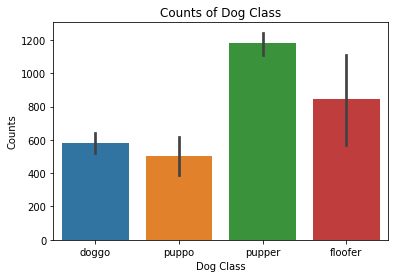

In [236]:
# plot the different dog classes and there counts
sns.barplot(y=twitter_master.dog_class.index, x=twitter_master.dog_class.values)
plt.xlabel('Dog Class')
plt.ylabel('Counts')
plt.title('Counts of Dog Class')
plt.show()

Plot the most common dog names in the dataset

In [237]:
# top 10 names 
names = twitter_master.name.value_counts().index[0:10]

In [238]:
# top 10 values
counts = twitter_master.name.value_counts()[0:10]

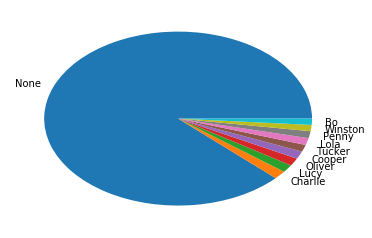

In [239]:
# pie chart 
plt.pie(counts, labels = names)
plt.show()

It seems, most of the dogs have no names. 

Do the same excluding "None" 

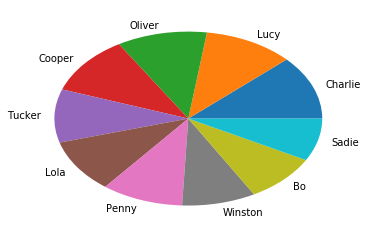

In [240]:
names1 = twitter_master.name.value_counts().index[1:11]
counts1 = twitter_master.name.value_counts()[1:11]
plt.pie(counts1, labels = names1)
plt.show()

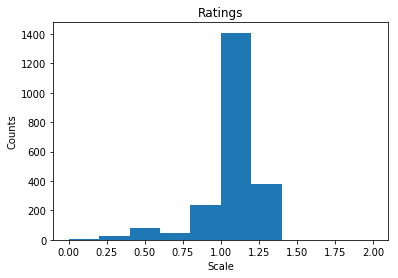

In [241]:
# plot ratings 
data = twitter_master.rating
plt.hist(data, bins = 10, range = [0, 2])
plt.title("Ratings")
plt.xlabel("Scale")
plt.ylabel("Counts")
plt.show()

In [242]:
data.describe()

count    2184.000000
mean        1.181181
std         3.887846
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

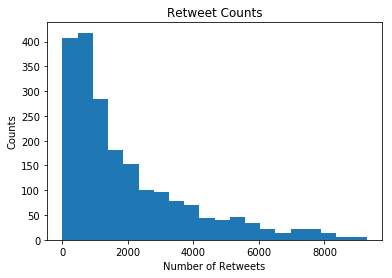

In [243]:
# plot retweets
limit = np.nanpercentile(twitter_master.retweets, 95)
parameter = twitter_master.retweets < limit
data_ret = twitter_master.retweets[parameter]
plt.hist(data_ret, bins = 20, range = [0, limit])
plt.title("Retweet Counts")
plt.xlabel("Number of Retweets")
plt.ylabel("Counts")
plt.show()

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


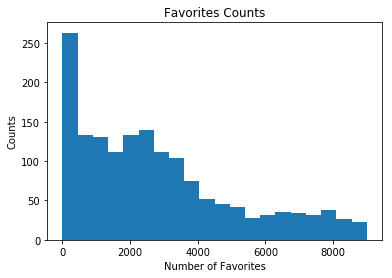

In [244]:
# plot favorites
data_fav = twitter_master.favorites
plt.hist(data_fav, bins = 20, range = [0, 9000])
plt.title("Favorites Counts")
plt.xlabel("Number of Favorites")
plt.ylabel("Counts")
plt.show()

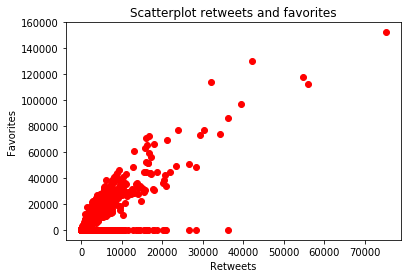

In [245]:
# scatterplot retweets and favorites 
x = twitter_master.retweets
y = twitter_master.favorites
plt.scatter(x, y, color="red")
plt.title("Scatterplot retweets and favorites")
plt.xlabel("Retweets")
plt.ylabel("Favorites")
plt.show()

In [246]:
twitter_master.p1_dog.sum() / len(twitter_master.p1_dog)

0.6675824175824175

In [247]:
twitter_master.p2_dog.sum() / len(twitter_master.p2_dog)

0.6762820512820513

In [248]:
twitter_master.p3_dog.sum() / len(twitter_master.p3_dog)

0.6543040293040293